In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merge_table = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types
Urban = merge_table.loc[(merge_table["type"]=="Urban")]
Suburban=merge_table.loc[(merge_table["type"]=="Suburban")]
Rural=merge_table.loc[(merge_table["type"]=="Rural")]


# Build the scatter plots for each city types
urbanpercity = Urban.groupby("city").mean()["fare"]
suburbanpercity = Suburban.groupby("city").mean()["fare"]
ruralpercity=Rural.groupby("city").mean()["fare"]

urbanrides = Urban.groupby("city").count()["ride_id"]
suburbanrides=Suburban.groupby("city").count()["ride_id"]
ruralrides=Rural.groupby("city").count()["ride_id"]


urbandrivercnt = Urban.groupby("city").count()["driver_count"]
suburbandrivercnt = Suburban.groupby("city").count()["driver_count"]
ruraldrivercnt = Rural.groupby("city").count()["driver_count"]

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


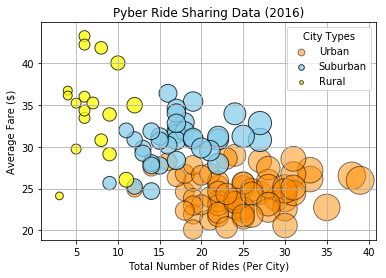

In [15]:
# Show plot
#plt.show()
plt.scatter(urbanrides, urbanpercity, marker="o", facecolors="darkorange", edgecolors="black",
            s=urbandrivercnt*20, alpha=0.5, label="Urban")
plt.scatter(suburbanrides, suburbanpercity, marker="o", facecolors="skyblue", edgecolors="black",
            s=suburbandrivercnt*20, alpha=0.75, label="Suburban")
plt.scatter(ruralrides, ruralpercity, marker="o", facecolors="yellow", edgecolors="black",
            s=ruraldrivercnt*20, alpha=0.75, label="Rural")

plt.legend(title='City Types',markerscale=0.3, scatterpoints=1, fontsize=10)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
#plt.grid
#plt.grid(color="black",linewidth=2)
plt.grid()
#plt.grid(which="major", axis="both")


## Total Fares by City Type

([<matplotlib.patches.Wedge at 0xa657e80>,
 [Text(-0.9735819188531014, 0.5119943820808126, 'Rural'),
  Text(-0.8505386879122898, -0.6975556897943278, 'Suburban'),
  Text(1.0682968754841204, 0.5465727635282113, 'Urban')],
 [Text(-0.5310446830107826, 0.2792696629531705, '6.8%'),
  Text(-0.4639301934067035, -0.38048492170599696, '30.5%'),
  Text(0.6231731773657369, 0.3188341120581232, '62.7%')])

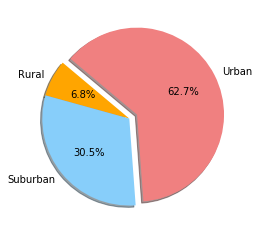

In [16]:
# Calculate Type Percents
citytype = merge_table.groupby("type")
citytype2 = city_data.groupby("type")

Totalfare = merge_table["fare"].sum()
Totalride = merge_table["ride_id"].count()
fares = citytype["fare"].sum()
ridecount = citytype["ride_id"].count()
drivercount = citytype2["driver_count"].sum()

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["orange", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0,0, 0.1)
# Save Figure
plt.pie(fares, labels=labels, explode = explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Total Rides by City Type

([<matplotlib.patches.Wedge at 0x56521d0>,
 [Text(-0.9475355551847633, 0.5587274574071894, 'Rural'),
  Text(-0.9860007094711902, -0.48765008040839053, 'Suburban'),
  Text(1.148528168888804, 0.3476823913702436, 'Urban')],
 [Text(-0.5168375755553254, 0.3047604313130124, '5.3%'),
  Text(-0.5378185688024674, -0.26599095295003117, '26.3%'),
  Text(0.6699747651851355, 0.20281472829930874, '68.4%')])

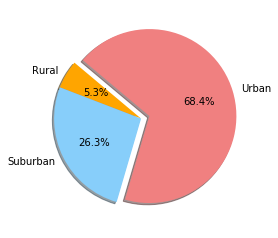

In [17]:
# Save Figure
plt.pie(ridecount, explode = explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Total Drivers by City Type

([<matplotlib.patches.Wedge at 0x9270668>,
 [Text(-0.8980009228297813, 0.6352907543769715, 'Rural'),
  Text(-1.0998678923138117, 0.017047564552569536, 'Suburban'),
  Text(1.1942514119628478, -0.11731822119664388, 'Urban')],
 [Text(-0.4898186851798806, 0.3465222296601662, '2.6%'),
  Text(-0.5999279412620789, 0.009298671574128836, '16.5%'),
  Text(0.6966466569783278, -0.0684356290313756, '80.9%')])

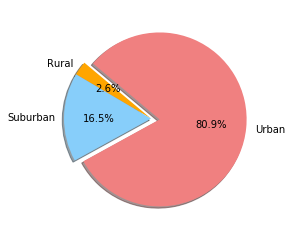

In [18]:
# Save Figure
plt.pie(drivercount, labels=labels, colors=colors,explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=140)